# Importing the libraries

In [1]:
# Essentials
import numpy as np
import pandas as pd

# Models
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Misc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Visualisation
%matplotlib inline
import matplotlib.pyplot as plt

# Warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# to make this notebook's output stable across runs
np.random.seed(42)

Generating Dataset

In [3]:
# generate moon dataset
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

Spliting data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Feature Scaling

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Voting Classifier

Hard Voting

In [6]:
# Classifiers we want to use
KNN_clf = KNeighborsClassifier()
SVM_clf = SVC(probability=True, random_state=42)
DT_clf = DecisionTreeClassifier(random_state=42)

# Defining Hard Voting Classifier
HardVoting_clf = VotingClassifier(
    estimators=[('KNN', KNN_clf), ('SVM', SVM_clf), ('DT', DT_clf)],
    voting='hard'
)

# Training Hard Voting Classifier
HardVoting_clf.fit(X_train, y_train)

# Accuracy Comparison
for clf in (KNN_clf, SVM_clf, DT_clf, HardVoting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.904
SVC 0.872
DecisionTreeClassifier 0.856
VotingClassifier 0.912


Soft Voting

In [7]:
# Using the same classifiers we used in Hard Voting

# Defining Soft Voting Classifier
SoftVoting_clf = VotingClassifier(
    estimators=[('KNN', KNN_clf), ('SVM', SVM_clf), ('DT', DT_clf)],
    voting='soft'
)

# Training Soft Voting Classifier
SoftVoting_clf.fit(X_train, y_train)

# Accuracy Comparison
for clf in (KNN_clf, SVM_clf, DT_clf, SoftVoting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.904
SVC 0.872
DecisionTreeClassifier 0.856
VotingClassifier 0.912


Ploting K-Nearest Neighbours (KNN), Support Vector Machine (SVM), and Decision Tree classifiers

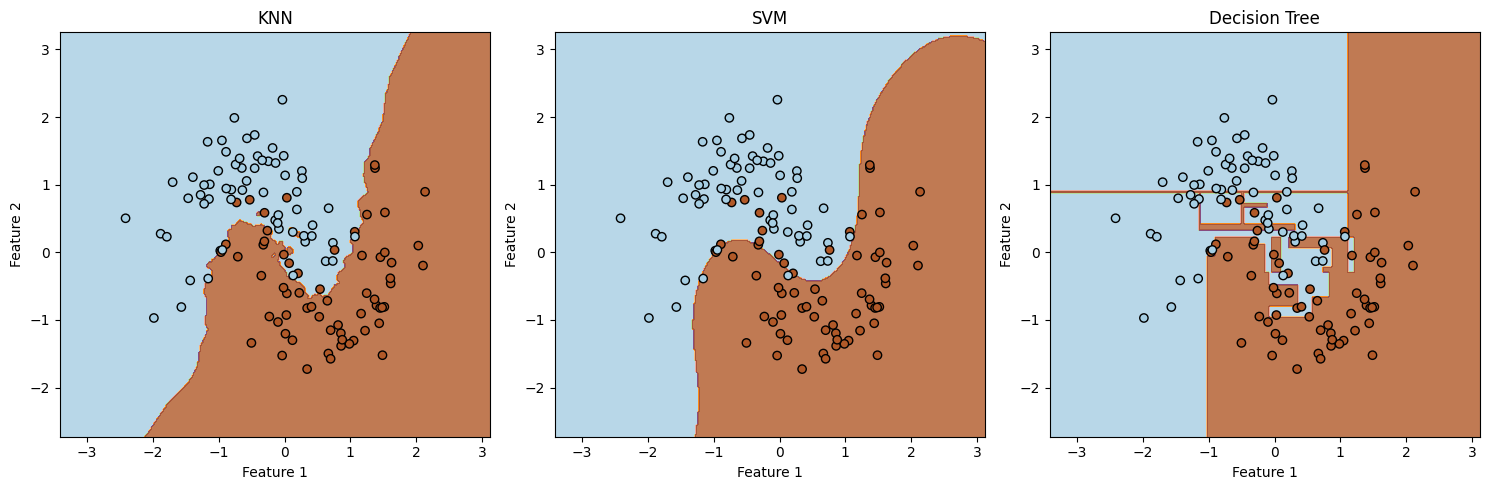

In [8]:
def plot_decision_boundary(ax, clf, X, y, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Rearrange the order of classifiers
classifiers = [KNN_clf, SVM_clf, DT_clf]

# Define titles
titles = ['KNN', 'SVM', 'Decision Tree']

# Create a 1x3 grid of plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot decision boundaries
for i, (clf, title) in enumerate(zip(classifiers, titles)):
    plot_decision_boundary(axes[i], clf, X_test, y_test, title)

plt.tight_layout()
plt.show()

Ploting Hard Voting Classifier vs Soft Voting Classifier

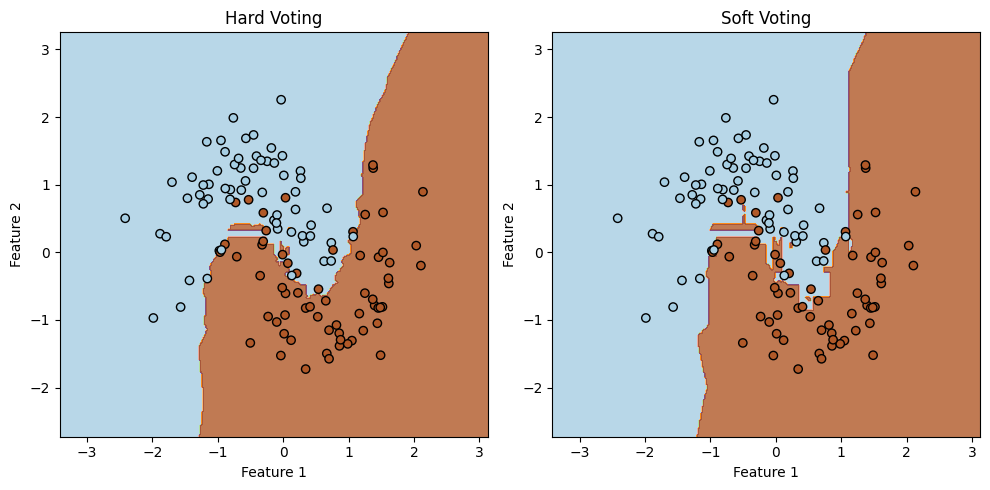

In [9]:
def plot_decision_boundary(ax, clf, X, y, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Define the classifiers
classifiers = [HardVoting_clf, SoftVoting_clf]

# Define titles
titles = ['Hard Voting', 'Soft Voting']

# Create a 1x2 grid of plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot decision boundaries
for i, (clf, title) in enumerate(zip(classifiers, titles)):
    plot_decision_boundary(axes[i], clf, X_test, y_test, title)

plt.tight_layout()
plt.show()

# Bagging

In [10]:
# Defining Bagging Classifier ( with replacement )
BAGG_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1
)

# Training Bagging Classifier ( with replacement )
BAGG_clf.fit(X_train, y_train) 

# Accuracy Score
y_pred = BAGG_clf.predict(X_test)
print(BAGG_clf.__class__.__name__, accuracy_score(y_pred, y_test))

BaggingClassifier 0.904


Decision Tree Classifier without Bagging

In [11]:
"""
# We have defined a Decision Tree Classifier in the Voting Classifier so we can use it, in case it wasn't defined:

# Defining Decision Tree Classifier
TREE_CLF = DecisionTreeClassifier(random_state=42)

# Training Decision Tree Classifier
TREE_CLF.fit(X_train, y_train)

# Accuracy Score without Bagging
y_pred = TREE_CLF.predict(X_test)
print(TREE_CLF.__class__.__name__, accuracy_score(y_pred, y_test))
"""
# Accuracy Score without Bagging
y_pred = DT_clf.predict(X_test)
print(DT_clf.__class__.__name__, accuracy_score(y_pred, y_test))

DecisionTreeClassifier 0.856


Ploting Decision Tree Classifier vs Decision Tree Classifier with Bagging

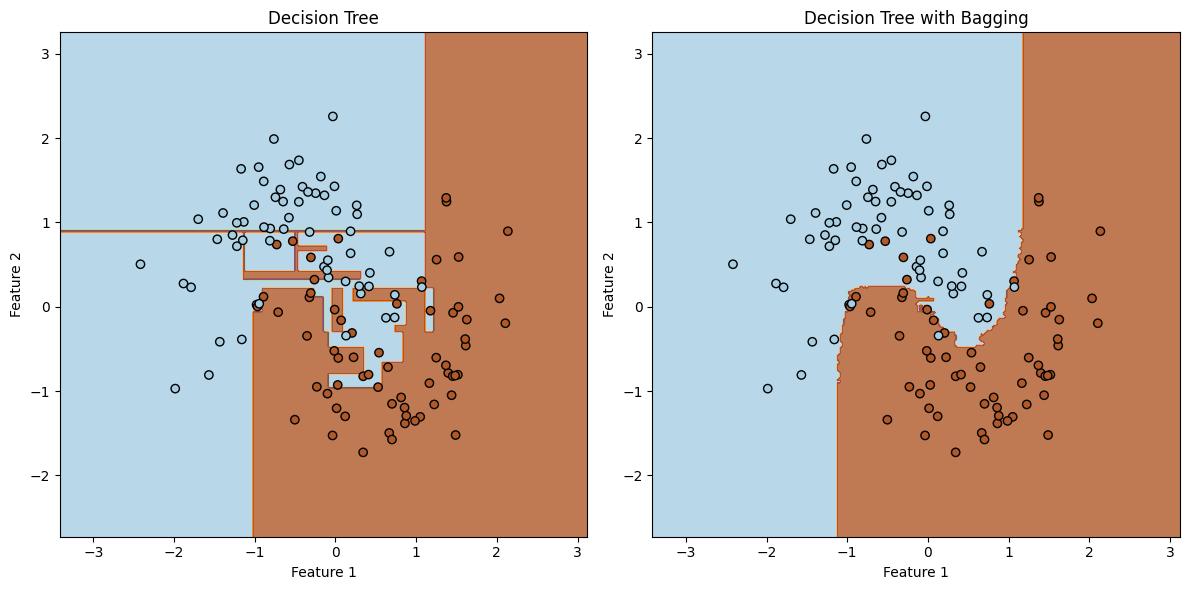

In [12]:
def plot_decision_boundary(ax, clf, X, y, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Plotting decision boundaries for the Decision Tree Classifier and Decision Tree Classifier with Bagging
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1: Decision Tree Classifier
plot_decision_boundary(axes[0], DT_clf, X_test, y_test, 'Decision Tree')

# Subplot 2: Decision Tree Classifier with Bagging
plot_decision_boundary(axes[1], BAGG_clf, X_test, y_test, 'Decision Tree with Bagging')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Pasting

In [13]:
# Defining Bagging Classifier ( without replacement )
PAST_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42),
    n_estimators=500,
    max_samples=100,
    bootstrap=False,
    n_jobs=-1
)

# Training Bagging Classifier ( without replacement )
PAST_clf.fit(X_train, y_train) 

# Accuracy Score
y_pred = PAST_clf.predict(X_test)
print(PAST_clf.__class__.__name__, accuracy_score(y_pred, y_test))

BaggingClassifier 0.912


Decision Tree Classifier without Pasting

In [14]:
# Same as Decision Tree Classifier without Bagging case

# Accuracy Score without Pasting
y_pred = DT_clf.predict(X_test)
print(DT_clf.__class__.__name__, accuracy_score(y_pred, y_test))

DecisionTreeClassifier 0.856


Ploting Decision Tree Classifier vs Decision Tree Classifier with Pasting

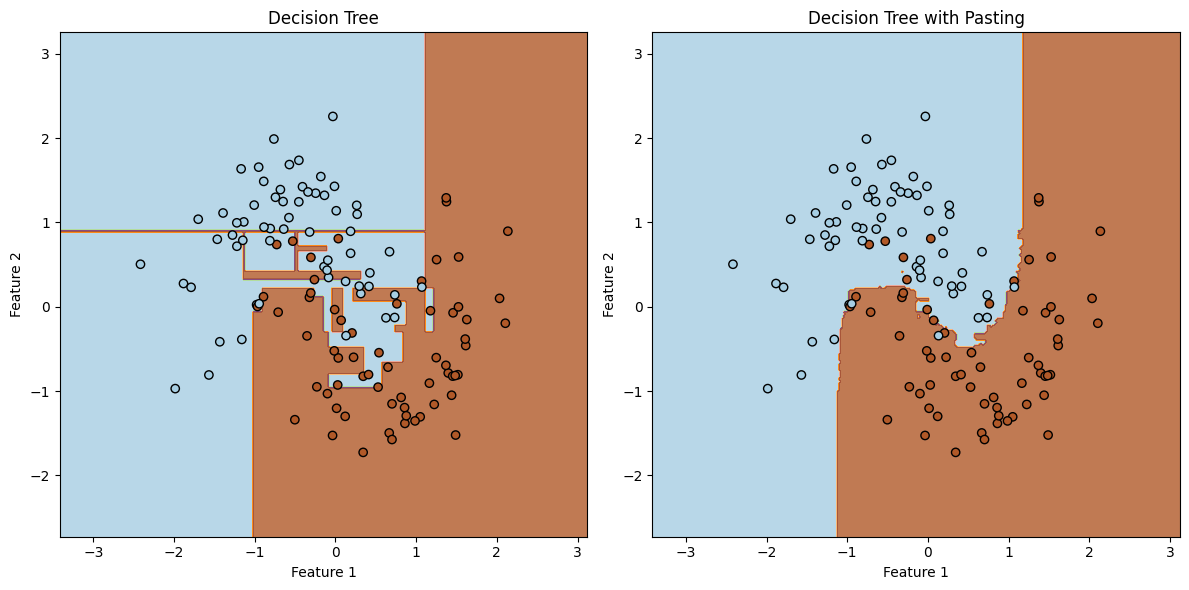

In [15]:
def plot_decision_boundary(ax, clf, X, y, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Plotting decision boundaries for the Decision Tree Classifier and Decision Tree Classifier with Pasting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1: Decision Tree Classifier
plot_decision_boundary(axes[0], DT_clf, X_test, y_test, 'Decision Tree')

# Subplot 2: Decision Tree Classifier with Pasting
plot_decision_boundary(axes[1], PAST_clf, X_test, y_test, 'Decision Tree with Pasting')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Bagging vs Pasting

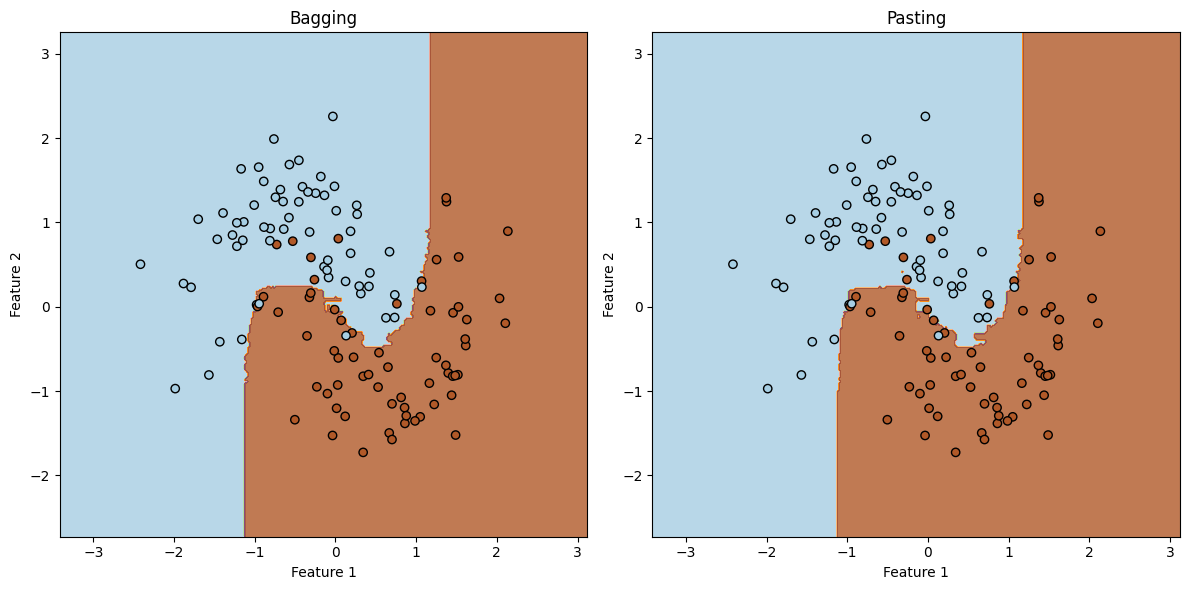

In [16]:
def plot_decision_boundary(ax, clf, X, y, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Plotting decision boundaries for the Bagging and Pasting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1: Bagging
plot_decision_boundary(axes[0], BAGG_clf, X_test, y_test, 'Bagging')

# Subplot 2: Pasting
plot_decision_boundary(axes[1], PAST_clf, X_test, y_test, 'Pasting')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Out-of-Bag (oob) Evaluation

In [17]:
# Defining Bagging Classifier with Out-of-Bag Evaluation
oob_bagg_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1,
    oob_score=True
)

# Training Bagging Classifier with Out-of-Bag Evaluation
oob_bagg_clf.fit(X_train, y_train) 

# Accuracy Score
y_pred = oob_bagg_clf.predict(X_test)
print(oob_bagg_clf.__class__.__name__, accuracy_score(y_pred, y_test))

BaggingClassifier 0.912


Decision function for oob

In [18]:
# returns the class probabilities for each training instance
oob_bagg_clf.oob_decision_function_

array([[0.38196286, 0.61803714],
       [0.40583554, 0.59416446],
       [1.        , 0.        ],
       [0.0122549 , 0.9877451 ],
       [0.02356021, 0.97643979],
       [0.09974425, 0.90025575],
       [0.3984375 , 0.6015625 ],
       [0.07349081, 0.92650919],
       [0.95907928, 0.04092072],
       [0.82368421, 0.17631579],
       [0.52671756, 0.47328244],
       [0.04381443, 0.95618557],
       [0.72987013, 0.27012987],
       [0.85974026, 0.14025974],
       [0.91623037, 0.08376963],
       [0.09375   , 0.90625   ],
       [0.03217158, 0.96782842],
       [0.92071611, 0.07928389],
       [0.69680851, 0.30319149],
       [0.94850949, 0.05149051],
       [0.04177546, 0.95822454],
       [0.22454308, 0.77545692],
       [0.89267016, 0.10732984],
       [0.98421053, 0.01578947],
       [0.94148936, 0.05851064],
       [0.        , 1.        ],
       [0.94601542, 0.05398458],
       [1.        , 0.        ],
       [0.01570681, 0.98429319],
       [0.72098765, 0.27901235],
       [0.

Bagging vs Bagging with Out-of-Bag Evaluation

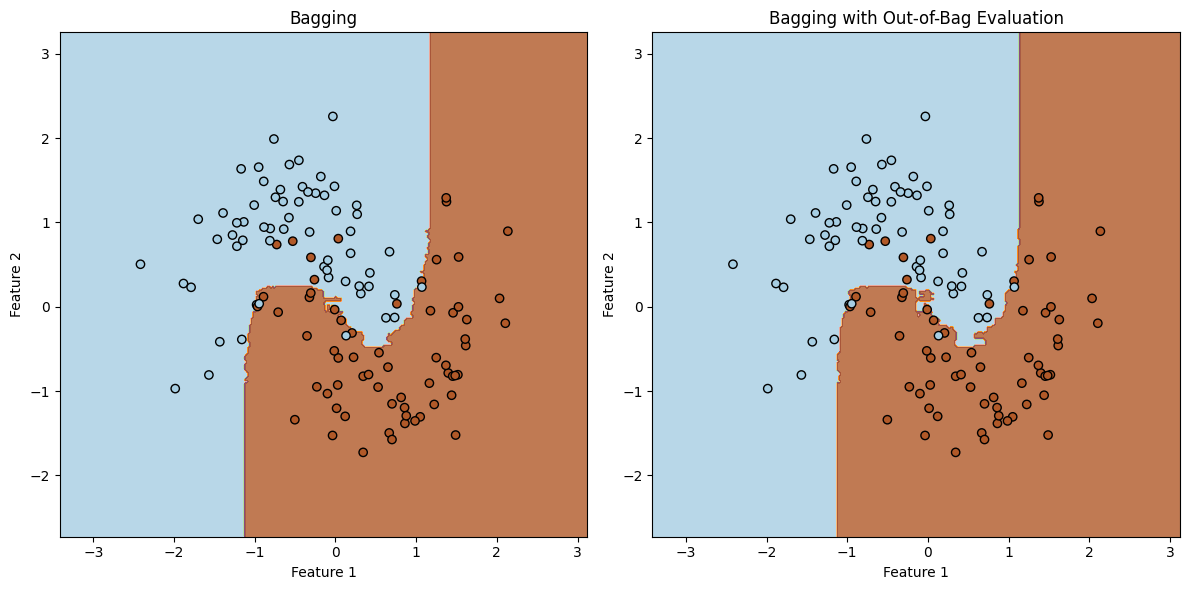

In [19]:
def plot_decision_boundary(ax, clf, X, y, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Plotting decision boundaries for Bagging and Bagging with Out-of-Bag Evaluation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1: Bagging
plot_decision_boundary(axes[0], BAGG_clf, X_test, y_test, 'Bagging')

# Subplot 2: Bagging with Out-of-Bag Evaluation
plot_decision_boundary(axes[1], oob_bagg_clf, X_test, y_test, 'Bagging with Out-of-Bag Evaluation')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Random Forest

Random Forest Classifier

In [20]:
# Defining Random Forest Classifier
RF_clf = RandomForestClassifier(
    n_estimators=500,
    max_leaf_nodes=16,
    n_jobs=-1
)

# Training Random Forest Classifier
RF_clf.fit(X_train, y_train)

# Accuracy score
y_pred = RF_clf.predict(X_test)
print(RF_clf.__class__.__name__, accuracy_score(y_pred, y_test))

RandomForestClassifier 0.912


Random Forest Classifier using Bagging Classifier

In [21]:
# Defining Random Forest Classifier using Bagging Classifier
rf_bagg_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
    n_estimators=500,
    max_samples=1.0,
    bootstrap=True,
    n_jobs=-1
)

# Training Random Forest Classifier using Bagging Classifier
rf_bagg_clf.fit(X_train, y_train)

# Accuracy score
y_pred = rf_bagg_clf.predict(X_test)
print(rf_bagg_clf.__class__.__name__, accuracy_score(y_pred, y_test))

BaggingClassifier 0.912


# My Ensemble Classifier

In [22]:
# Defining my_ensemble_clf
my_ensemble_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
    n_estimators=500,
    max_samples=1.0,
    bootstrap=True,
    bootstrap_features=True,
    max_features=1.0,
    n_jobs=-1
)

# Training my_ensemble_clf
my_ensemble_clf.fit(X_train, y_train)

# Accuracy score
y_pred = my_ensemble_clf.predict(X_test)
print(my_ensemble_clf.__class__.__name__, accuracy_score(y_pred, y_test))


BaggingClassifier 0.912


# Accuracy Comparison for All the Classifiers

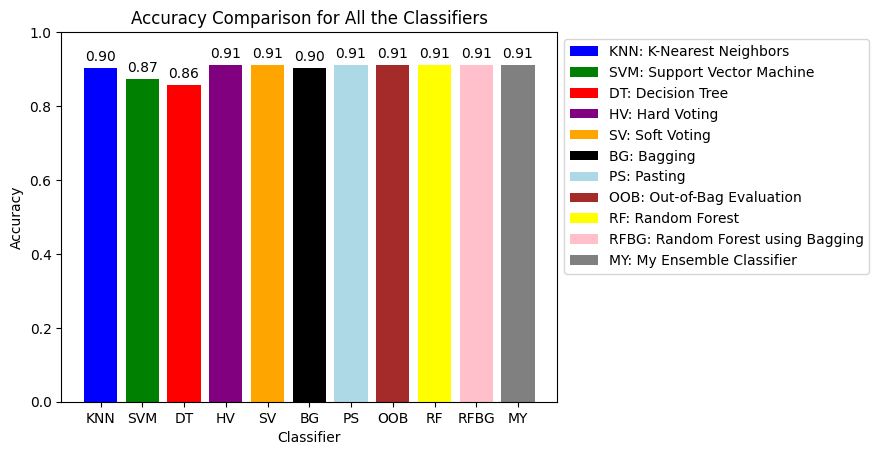

In [23]:
classifiers = [
    KNN_clf, SVM_clf, DT_clf, HardVoting_clf, SoftVoting_clf, BAGG_clf, PAST_clf, oob_bagg_clf, RF_clf, rf_bagg_clf, my_ensemble_clf
]

# Collect accuracy scores and classifier names
accuracy_scores = []
classifier_names = ['KNN', 'SVM', 'DT', 'HV', 'SV', 'BG', 'PS', 'OOB', 'RF', 'RFBG', 'MY']

# Map classifier names to their descriptions
classifier_descriptions = {
    'KNN': 'K-Nearest Neighbors',
    'SVM': 'Support Vector Machine',
    'DT': 'Decision Tree',
    'HV': 'Hard Voting',
    'SV': 'Soft Voting',
    'BG': 'Bagging',
    'PS': 'Pasting',
    'OOB': 'Out-of-Bag Evaluation',
    'RF': 'Random Forest',
    'RFBG': 'Random Forest using Bagging',
    'MY': 'My Ensemble Classifier'
}

for clf in classifiers:

    # Predictions on test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plotting the bar graph with annotations and legend
fig, ax = plt.subplots()
bars = ax.bar(classifier_names, accuracy_scores, color=['blue', 'green', 'red', 'purple', 'orange', 'black', 'lightblue', 'brown', 'yellow', 'pink', 'grey'])

# Annotate each bar with its corresponding accuracy value
for bar, acc in zip(bars, accuracy_scores):
    height = bar.get_height()
    ax.annotate(f'{acc:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Add legend
legend_labels = [f'{name}: {classifier_descriptions[name]}' for name in classifier_names]
ax.legend(bars, legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for All the Classifiers')
plt.ylim(0, 1)  # Set y-axis limit to ensure accuracy values are within the range [0, 1]
plt.show()